In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
52892,52892,93582,93583,Why is it so hard to get an attorney to take m...,How can I litigate if no attorneys will take t...,0
37724,37724,33197,68609,How long does it take for the human body to re...,How much blood can a human donate in a day?,0
76063,76063,84412,130077,"Why do US school grades go A, B, C, D, and F. ...","Why does the US education system use grades A,...",1
221519,221519,328878,328879,Is there a website like Zomato in shopping?,I have an idea for a service website like Zoma...,0
358018,358018,270883,487447,How much does YouTube charge for live streaming?,How much does it cost to live stream a UFC fight?,0
225516,225516,333865,333866,What is the primary 25-label categorization th...,How can I a sell a product using my own label ...,0
186781,186781,105454,284821,How does the brain create consciousness?,How does the brain generate consciousness?,1
297108,297108,419443,419444,Advantages and dis advantages of commerce?,Boy and girl can be a best friend?,0
19242,19242,36379,36380,Why do Hindus offer water to the Sun?,How are Indian Hindus different from Nepali Hi...,0
58134,58134,102047,102048,"What is the English translation of ""dep qua""?",What is the English translation of 存在即是合理的?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


In [8]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

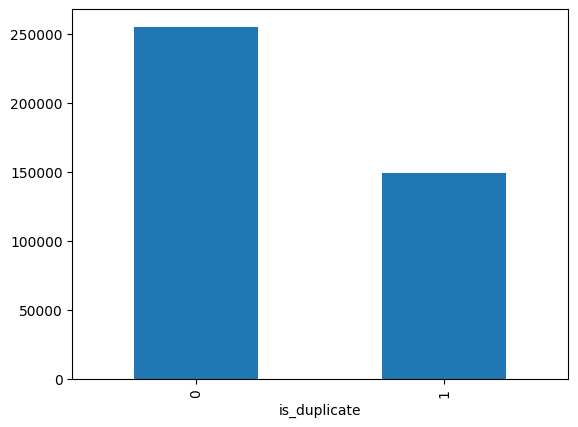

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions:',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated:',x[x].shape[0])

Number of unique questions: 537933
Number of questions getting repeated: 111780


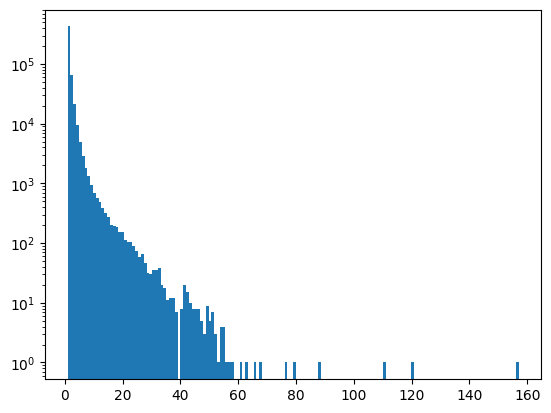

In [12]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()